In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

In [ ]:
df= pd.read_csv('/gdrive/MyDrive/Colab Notebooks/MiniProject-2-Dataset/csh101.ann.features.csv', header=[0])

In [ ]:
df

,lastSensorEventHours,lastSensorEventSeconds,Date,Time,Dateandtime,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,...,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity,class
0,10,38464,20-07-2012,10:41:04,20-07-2012 10:41,4,130,0,0,0,...,86400.000000,86400,0.000000,86400.000000,86400.000000,86400,1.816728,86400,Step_Out,27
1,10,38465,20-07-2012,10:41:05,20-07-2012 10:41,4,131,1,0,0,...,86400.000000,86400,0.055818,86400.000000,86400.000000,86400,0.000000,86400,Step_Out,27
2,10,38578,20-07-2012,10:42:58,20-07-2012 10:42,4,241,113,0,0,...,86400.000000,86400,0.000000,86400.000000,86400.000000,86400,113.423815,86400,Step_Out,27
3,10,38582,20-07-2012,10:43:02,20-07-2012 10:43,4,244,4,0,0,...,86400.000000,86400,0.000000,86400.000000,86400.000000,86400,117.696845,86400,Step_Out,27
4,10,38582,20-07-2012,10:43:02,20-07-2012 10:43,4,243,0,0,0,...,86400.000000,86400,0.063296,86400.000000,86400.000000,86400,0.000000,86400,Step_Out,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321423,23,85938,21-09-2012,23:52:18,21-09-2012 23:52,0,124,1,1,1,...,3266.294198,86400,59.532519,3267.785714,1384.742962,86400,1431.566214,86400,Other_Activity,20
321424,23,85990,21-09-2012,23:53:10,21-09-2012 23:53,0,146,52,1,1,...,3317.884144,86400,111.122465,3319.375660,1436.332908,86400,1483.156160,86400,Other_Activity,20
321425,23,85992,21-09-2012,23:53:12,21-09-2012 23:53,0,147,2,1,1,...,3319.782223,86400,113.020544,3321.273739,1438.230987,86400,1485.054239,86400,Other_Activity,20
321426,23,85994,21-09-2012,23:53:14,21-09-2012 23:53,0,148,2,1,1,...,3322.384894,86400,115.623215,3323.876410,1440.833658,86400,1487.656910,86400,Other_Activity,20


In [ ]:
df.columns

Index(['lastSensorEventHours', 'lastSensorEventSeconds', 'Date', 'Time',
       'Dateandtime', 'lastSensorDayOfWeek', 'windowDuration',
       'timeSinceLastSensorEvent', 'prevDominantSensor1',
       'prevDominantSensor2', 'lastSensorID', 'lastSensorLocation',
       'lastMotionLocation', 'complexity', 'activityChange', 'areaTransitions',
       'numDistinctSensors', 'sensorCount-Bathroom', 'sensorCount-Bedroom',
       'sensorCount-Chair', 'sensorCount-DiningRoom', 'sensorCount-Hall',
       'sensorCount-Ignore', 'sensorCount-Kitchen', 'sensorCount-LivingRoom',
       'sensorCount-Office', 'sensorCount-OutsideDoor', 'sensorCount-WorkArea',
       'sensorElTime-Bathroom', 'sensorElTime-Bedroom', 'sensorElTime-Chair',
       'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore',
       'sensorElTime-Kitchen', 'sensorElTime-LivingRoom',
       'sensorElTime-Office', 'sensorElTime-OutsideDoor',
       'sensorElTime-WorkArea', 'activity', 'class'],
      dtype='object')

In [ ]:
df[['activity']].describe()

,activity
count,321428
unique,35
top,Other_Activity
freq,90824


In [ ]:
a=df['activity'].unique()
a.sort()
print(a)

['Bathe' 'Bed_Toilet_Transition' 'Cook' 'Cook_Breakfast' 'Cook_Dinner'
 'Cook_Lunch' 'Dress' 'Drink' 'Eat' 'Eat_Breakfast' 'Eat_Dinner'
 'Eat_Lunch' 'Enter_Home' 'Entertain_Guests' 'Evening_Meds' 'Go_To_Sleep'
 'Groom' 'Leave_Home' 'Morning_Meds' 'Other_Activity' 'Personal_Hygiene'
 'Phone' 'Read' 'Relax' 'Sleep' 'Sleep_Out_Of_Bed' 'Step_Out' 'Toilet'
 'Wake_Up' 'Wash_Breakfast_Dishes' 'Wash_Dinner_Dishes' 'Wash_Dishes'
 'Wash_Lunch_Dishes' 'Watch_TV' 'Work_At_Table']


In [ ]:
value_counts=df['activity'].value_counts()
print(value_counts)

Other_Activity           90824
Watch_TV                 61312
Sleep_Out_Of_Bed         16618
Bathe                    16289
Cook_Breakfast           16279
Dress                    14051
Toilet                   13727
Personal_Hygiene         13221
Sleep                    11752
Read                      8608
Relax                     5777
Cook_Dinner               5557
Drink                     3794
Eat_Breakfast             3564
Morning_Meds              3543
Evening_Meds              3359
Cook_Lunch                3197
Wash_Breakfast_Dishes     3197
Wash_Dishes               3194
Leave_Home                3124
Cook                      2764
Enter_Home                2594
Entertain_Guests          2568
Wash_Dinner_Dishes        2459
Phone                     1846
Groom                     1797
Step_Out                  1491
Eat_Dinner                1092
Eat_Lunch                  866
Wash_Lunch_Dishes          773
Bed_Toilet_Transition      720
Eat                        496
Go_To_Sl

In [ ]:
df=df.drop(['Dateandtime','Date','Time','class'],axis=1)

In [ ]:
label_encoder=LabelEncoder()
encoded_labels=label_encoder.fit_transform(df['activity'])
df['label']=encoded_labels

# Generating X and Y

In [ ]:
x=df.drop('activity',axis=1)
x

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,label
0,10,38464,4,130,0,0,0,5,5,9,...,86400,86400.000000,86400,0.000000,86400.000000,86400.000000,86400,1.816728,86400,26
1,10,38465,4,131,1,0,0,9,9,9,...,86400,86400.000000,86400,0.055818,86400.000000,86400.000000,86400,0.000000,86400,26
2,10,38578,4,241,113,0,0,5,5,9,...,86400,86400.000000,86400,0.000000,86400.000000,86400.000000,86400,113.423815,86400,26
3,10,38582,4,244,4,0,0,5,5,9,...,86400,86400.000000,86400,0.000000,86400.000000,86400.000000,86400,117.696845,86400,26
4,10,38582,4,243,0,0,0,9,9,9,...,86400,86400.000000,86400,0.063296,86400.000000,86400.000000,86400,0.000000,86400,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321423,23,85938,0,124,1,1,1,1,1,1,...,86400,3266.294198,86400,59.532519,3267.785714,1384.742962,86400,1431.566214,86400,19
321424,23,85990,0,146,52,1,1,1,1,1,...,86400,3317.884144,86400,111.122465,3319.375660,1436.332908,86400,1483.156160,86400,19
321425,23,85992,0,147,2,1,1,1,1,1,...,86400,3319.782223,86400,113.020544,3321.273739,1438.230987,86400,1485.054239,86400,19
321426,23,85994,0,148,2,1,1,1,1,1,...,86400,3322.384894,86400,115.623215,3323.876410,1440.833658,86400,1487.656910,86400,19


In [ ]:
y=df['label']
y

0         26
1         26
2         26
3         26
4         26
          ..
321423    19
321424    19
321425    19
321426    19
321427    19
Name: label, Length: 321428, dtype: int64

## Splitting the Dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

## Shapes of Train and Test Datasets

In [ ]:
x_train.shape,x_test.shape

((224999, 37), (96429, 37))

In [ ]:
y_train.shape,y_test.shape

((224999,), (96429,))

# Random Forest CLassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,max_features='auto',random_state=100)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [ ]:
rfc_preds=rfc.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


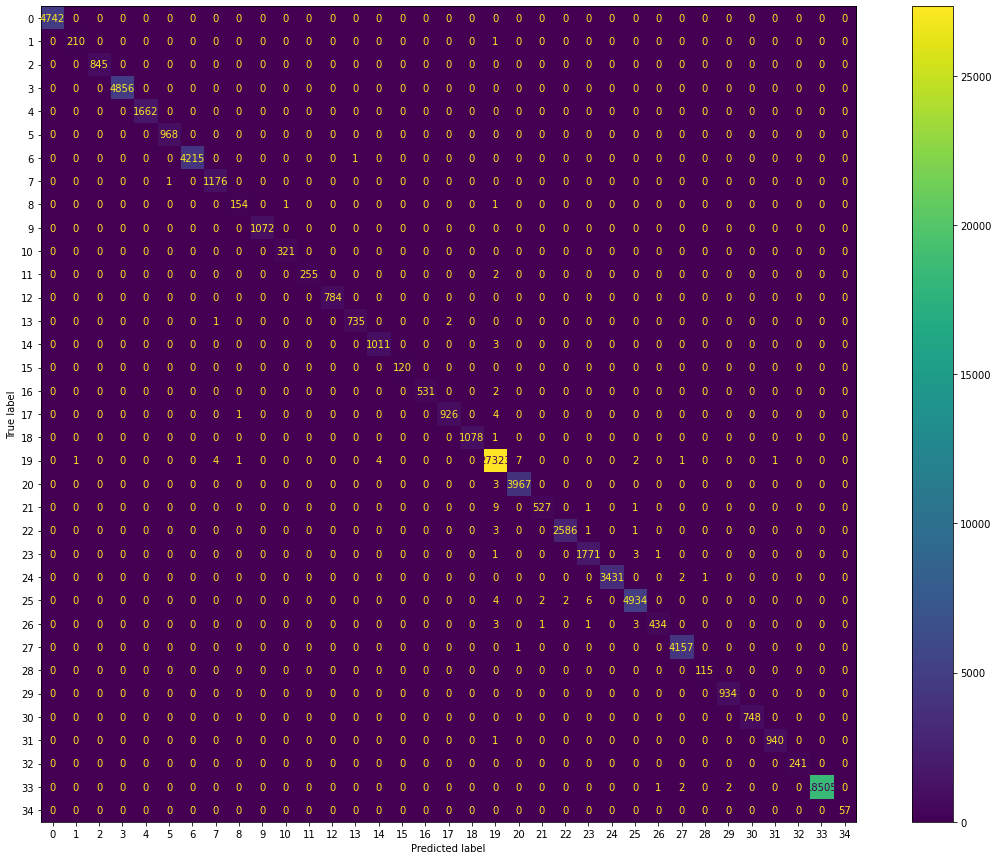

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=90)
plot_confusion_matrix(rfc,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4742
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       845
           3       1.00      1.00      1.00      4856
           4       1.00      1.00      1.00      1662
           5       1.00      1.00      1.00       968
           6       1.00      1.00      1.00      4216
           7       1.00      1.00      1.00      1177
           8       0.99      0.99      0.99       156
           9       1.00      1.00      1.00      1072
          10       1.00      1.00      1.00       321
          11       1.00      0.99      1.00       257
          12       1.00      1.00      1.00       784
          13       1.00      1.00      1.00       738
          14       1.00      1.00      1.00      1014
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00       533
          17       1.00    

In [ ]:
rfc_accuracy=accuracy_score(y_test, rfc_preds)
rfc_accuracy=rfc_accuracy*100
print("The accuracy for Random forest classifier model is",round(rfc_accuracy,5),"%")

The accuracy for Random forest classifier model is 99.89837 %


# Decision Tree Classifier

##Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10,20,30],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(x_train, y_train)
print(clf.best_params_)

In [ ]:
from scipy.stats import entropy
dtree_model = DecisionTreeClassifier(max_depth = None,criterion='entropy',max_features=0.8,splitter='best').fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


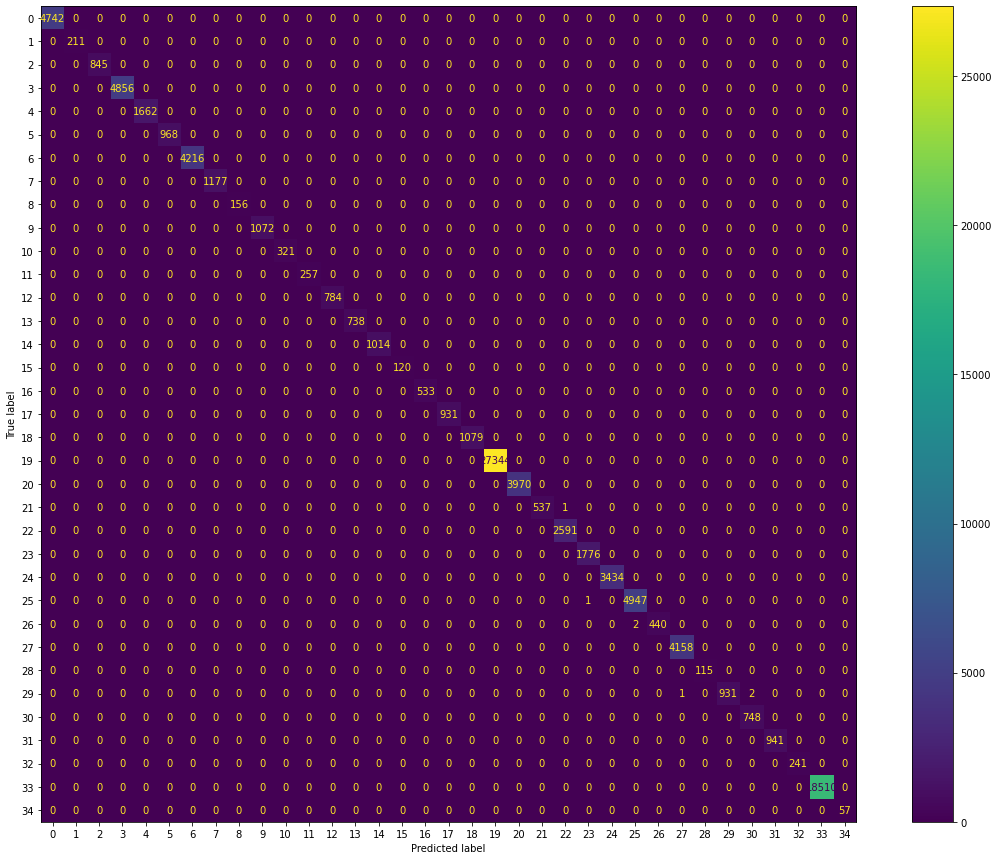

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=90)
plot_confusion_matrix(dtree_model,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4742
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       845
           3       1.00      1.00      1.00      4856
           4       1.00      1.00      1.00      1662
           5       1.00      1.00      1.00       968
           6       1.00      1.00      1.00      4216
           7       1.00      1.00      1.00      1177
           8       1.00      1.00      1.00       156
           9       1.00      1.00      1.00      1072
          10       1.00      1.00      1.00       321
          11       1.00      1.00      1.00       257
          12       1.00      1.00      1.00       784
          13       1.00      1.00      1.00       738
          14       1.00      1.00      1.00      1014
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00       533
          17       1.00    

In [ ]:
dt_accuracy=accuracy_score(y_test, dtree_predictions)
dt_accuracy=dt_accuracy*100
print("The accuracy for Random forest classifier model is",round(dt_accuracy,5),"%")

The accuracy for Random forest classifier model is 99.99274 %


# K-Nearest Neighbour Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
knn_preds=knn.predict(x_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


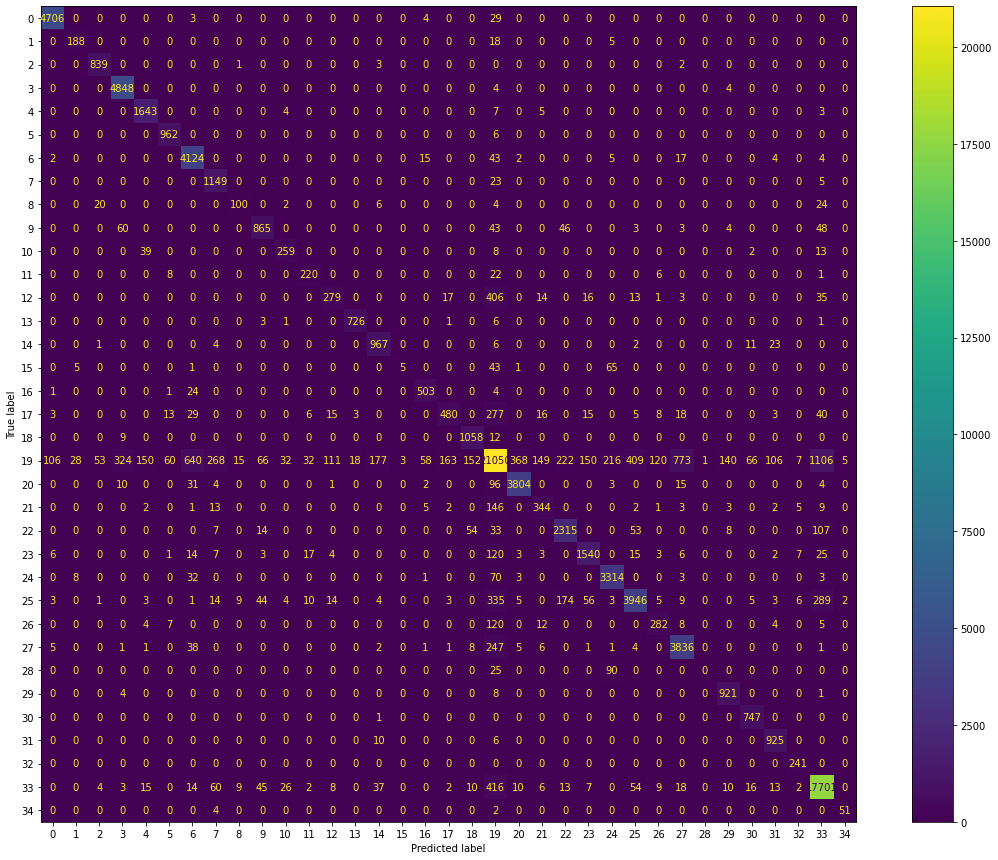

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=180)
plot_confusion_matrix(knn,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4742
           1       0.82      0.89      0.85       211
           2       0.91      0.99      0.95       845
           3       0.92      1.00      0.96      4856
           4       0.88      0.99      0.93      1662
           5       0.91      0.99      0.95       968
           6       0.83      0.98      0.90      4216
           7       0.75      0.98      0.85      1177
           8       0.75      0.64      0.69       156
           9       0.83      0.81      0.82      1072
          10       0.79      0.81      0.80       321
          11       0.77      0.86      0.81       257
          12       0.65      0.36      0.46       784
          13       0.97      0.98      0.98       738
          14       0.80      0.95      0.87      1014
          15       0.62      0.04      0.08       120
          16       0.85      0.94      0.90       533
          17       0.72    

In [ ]:
knn_accuracy=accuracy_score(y_test, knn_preds)
knn_accuracy=knn_accuracy*100
print("The accuracy for K-Nearest Neighbour model is",round(knn_accuracy,2),"%")

The accuracy for K-Nearest Neighbour model is 88.08 %


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


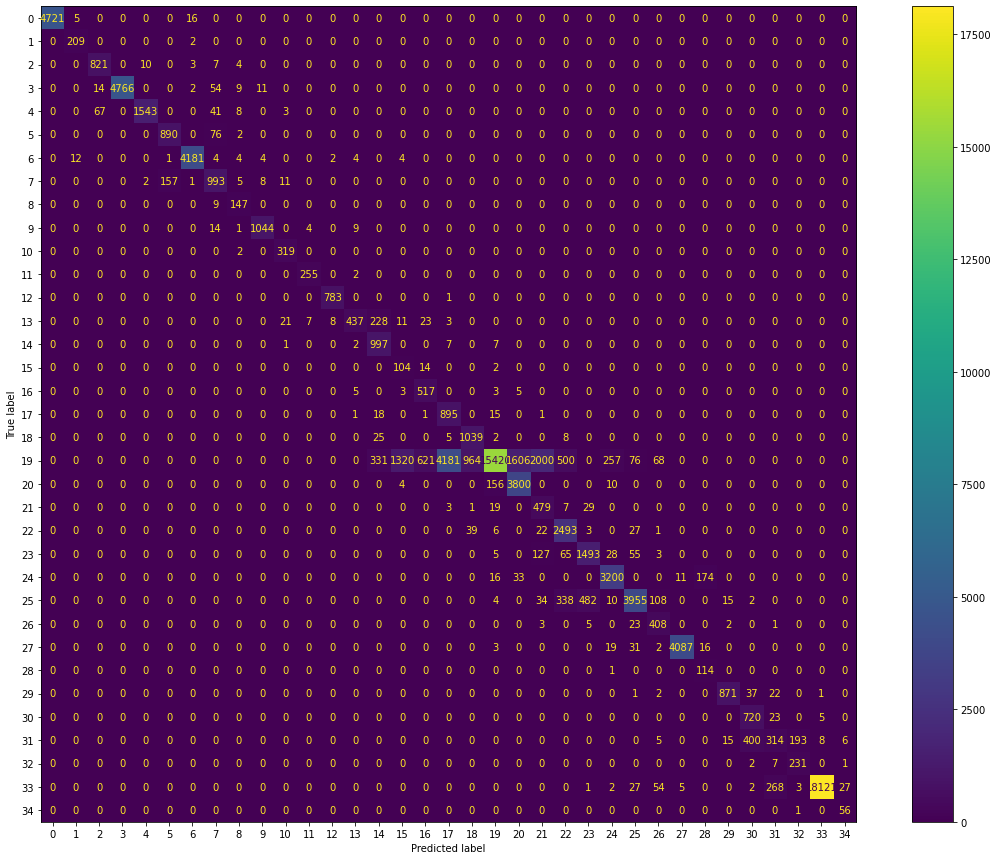

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=180)
plot_confusion_matrix(gnb,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4742
           1       0.92      0.99      0.96       211
           2       0.91      0.97      0.94       845
           3       1.00      0.98      0.99      4856
           4       0.99      0.93      0.96      1662
           5       0.85      0.92      0.88       968
           6       0.99      0.99      0.99      4216
           7       0.83      0.84      0.84      1177
           8       0.81      0.94      0.87       156
           9       0.98      0.97      0.98      1072
          10       0.90      0.99      0.94       321
          11       0.96      0.99      0.98       257
          12       0.99      1.00      0.99       784
          13       0.95      0.59      0.73       738
          14       0.62      0.98      0.76      1014
          15       0.07      0.87      0.13       120
          16       0.44      0.97      0.61       533
          17       0.18    

In [ ]:
gnb_accuracy=accuracy_score(y_test, gnb_pred)
gnb_accuracy=gnb_accuracy*100
print("The accuracy for Gaussian Naive Bayes model is",round(gnb_accuracy,2),"%")

The accuracy for Gaussian Naive Bayes model is 83.4 %


# X Gradient Boost

In [ ]:
xgb = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed= 4353)

In [ ]:
xgb.fit(x_train, y_train)
XGB_pred= xgb.predict(x_test)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation=180)
plot_confusion_matrix(xgb,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test, XGB_pred))

In [ ]:
XGB_accuracy=accuracy_score(y_test, XGB_pred)
XGB_accuracy=XGB_accuracy*100
print("The accuracy for X-Gradient Boost model is",round(XGB_accuracy,2),"%")

#LSTM-RNN Model

In [ ]:
x_train.shape,x_test.shape

((224999, 37), (96429, 37))

In [ ]:
y_train.shape,y_test.shape

((224999,), (96429,))

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
Y_train= label_encoder.fit_transform(y_train)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
Y_test= label_encoder.fit_transform(y_test)

In [ ]:
X_train=np.reshape(np.array(x_train),(224999,-1,37))
X_test=np.reshape(np.array(x_test),(96429,-1,37))

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_train.shape,X_test.shape

((224999, 1, 37), (96429, 1, 37))

In [ ]:
Y_train.shape,Y_test.shape

((224999, 35), (96429, 35))

#Validation Data

In [ ]:
X_test,X_val,Y_test,Y_val=train_test_split(X_test,Y_test,test_size=0.5,random_state=100)

In [ ]:
X_test.shape,X_val.shape

((48214, 1, 37), (48215, 1, 37))

In [ ]:
Y_test.shape,Y_val.shape

((48214, 35), (48215, 35))

#LSTM Architecture

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=37, recurrent_activation="sigmoid",activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               301056    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 35)                2

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
7032/7032 [==============================] - 81s 11ms/step - loss: 12.2487 - accuracy: 0.2783 - val_loss: 2.6084 - val_accuracy: 0.2824
Epoch 2/20
7032/7032 [==============================] - 61s 9ms/step - loss: 2.6340 - accuracy: 0.2821 - val_loss: 2.6077 - val_accuracy: 0.2824
Epoch 3/20
7032/7032 [==============================] - 62s 9ms/step - loss: 2.6190 - accuracy: 0.2821 - val_loss: 2.6075 - val_accuracy: 0.2824
Epoch 4/20
7032/7032 [==============================] - 62s 9ms/step - loss: 2.6114 - accuracy: 0.2821 - val_loss: 2.6076 - val_accuracy: 0.2824
Epoch 5/20
7032/7032 [==============================] - 64s 9ms/step - loss: 2.6107 - accuracy: 0.2821 - val_loss: 2.6076 - val_accuracy: 0.2824
Epoch 6/20
7032/7032 [==============================] - 61s 9ms/step - loss: 2.6088 - accuracy: 0.2821 - val_loss: 2.6074 - val_accuracy: 0.2824
Epoch 7/20
7032/7032 [==============================] - 63s 9ms/step - loss: 2.6089 - accuracy: 0.2821 - val_loss: 2.6075 - val_

In [ ]:
validation_loss,lstm_accuracy = model.evaluate(X_test, Y_test, batch_size=32, verbose=0)

In [ ]:
lstm_accuracy=lstm_accuracy*100

In [ ]:
print("The accuracy for LSTM model is",round(lstm_accuracy,2),"%")

The accuracy for LSTM model is 28.48 %


#Plotting All Accuracies

In [ ]:
model = ['Random Forest','logistic regression','linear svc','KNN','LSTM','GaussianNaiveBayes']
#acc = [rfc_accuracy, knn_accuracy,lstm_accuracy,gnb_accuracy]
acc=[99.89,30.52,31.72,88.08,28.21,83.4]
t=['Random Forest:99.89%','logistic regression:30.52%','linear svc:31.72%','KNN:88.08%','LSTM:28.21%','GaussianNaiveBayes:83.4%']


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=model,
    y=acc,
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=t,
    textposition="top center",
    textfont=dict(
        family="sans serif",
        size=12,
        color="crimson"
    )
))
fig.update_layout(showlegend=False)

fig.show()